# Listing  7.1 Single Linear Regression

   Year  Stock Market Returns  returns  Republican won  oil price  gold_prices
0  1960                 0.005      0.5               0       1.63        35.27
1  1964                 0.165     16.5               0       1.45        35.10
2  1968                 0.111     11.1               1       1.32        39.31
3  1972                 0.190     19.0               1       1.82        58.42
4  1976                 0.238     23.8               0      11.60       124.74
   oil price  gold_prices
0       1.63        35.27
1       1.45        35.10
2       1.32        39.31
3       1.82        58.42
4      11.60       124.74


<Figure size 432x288 with 0 Axes>

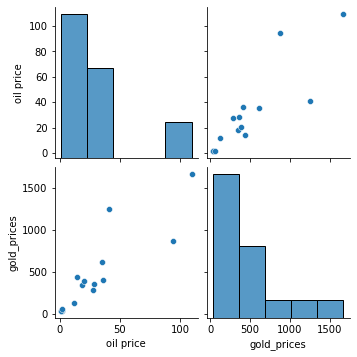

In [1]:
#Listing 7.1.1
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


df = pd.read_excel('../Datasets/Chapter 7/sp_oil_gold.xlsx')
print(df.head())

df=df[['oil price','gold_prices']]
print(df.head())

# plot numerical data as pairs
plt.figure(0)
sns.pairplot(df);


In [2]:
x=df['gold_prices'].values
print(type(x))
x

<class 'numpy.ndarray'>


array([  35.27,   35.1 ,   39.31,   58.42,  124.74,  615.  ,  361.  ,
        437.  ,  343.82,  387.81,  279.11,  409.72,  871.96, 1668.98,
       1250.74])

In [3]:
x=df['gold_prices'].values.reshape(-1, 1)
print(type(x))
x

<class 'numpy.ndarray'>


array([[  35.27],
       [  35.1 ],
       [  39.31],
       [  58.42],
       [ 124.74],
       [ 615.  ],
       [ 361.  ],
       [ 437.  ],
       [ 343.82],
       [ 387.81],
       [ 279.11],
       [ 409.72],
       [ 871.96],
       [1668.98],
       [1250.74]])

In [4]:
y=df['oil price'].values
y

array([  1.63,   1.45,   1.32,   1.82,  11.6 ,  35.52,  28.2 ,  14.24,
        18.44,  20.29,  27.6 ,  36.05,  94.1 , 109.45,  40.76])

intercept: 1.9883089098584428
slope: [0.05964825]
equation of oil prices in the presedential election years= 1.9883089098584428 + 0.05964824505883558 *gold_prices


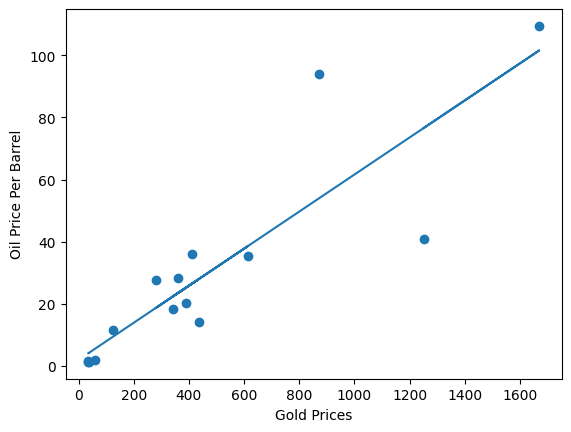

In [5]:
#Listing 7.1.2
x=df['gold_prices'].values.reshape(-1, 1)
y=df['oil price'].values

LR = LinearRegression()

LR.fit(x,y)

print('intercept:', LR.intercept_)
print('slope:', LR.coef_)
print('equation of oil prices in the presedential election years=',LR.intercept_,"+",LR.coef_[0],"*gold_prices")
plt.figure(2)
plt.scatter(x, y)
plt.xlabel('Gold Prices')
plt.ylabel('Oil Price Per Barrel')
plt.plot(x,LR.intercept_+LR.coef_*x)


In [6]:
#Listing 7.1.3

y_prediction =  LR.predict(x)
print('y_prediction=',y_prediction)

score=r2_score(y,y_prediction)
print('r2 socre = ',score)
print('mean_sqrd_error =',mean_squared_error(y,y_prediction))
print('root_mean_squared error =',np.sqrt(mean_squared_error(y,y_prediction)))


y_prediction= [  4.09210251   4.08196231   4.33308142   5.47295939   9.428831
  38.67197962  23.52132538  28.054592    22.49656853  25.12049483
  18.63673059  26.42738788  53.99919267 101.54003695  76.59275493]
r2 socre =  0.766030417790836
mean_sqrd_error = 228.6764484200374
root_mean_squared error = 15.122051726536231


<Figure size 640x480 with 0 Axes>

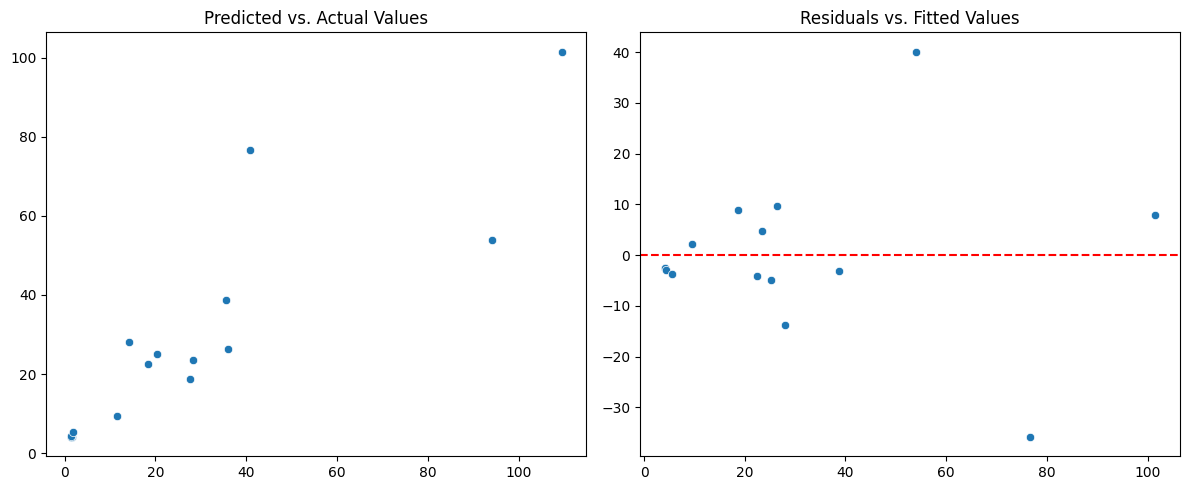

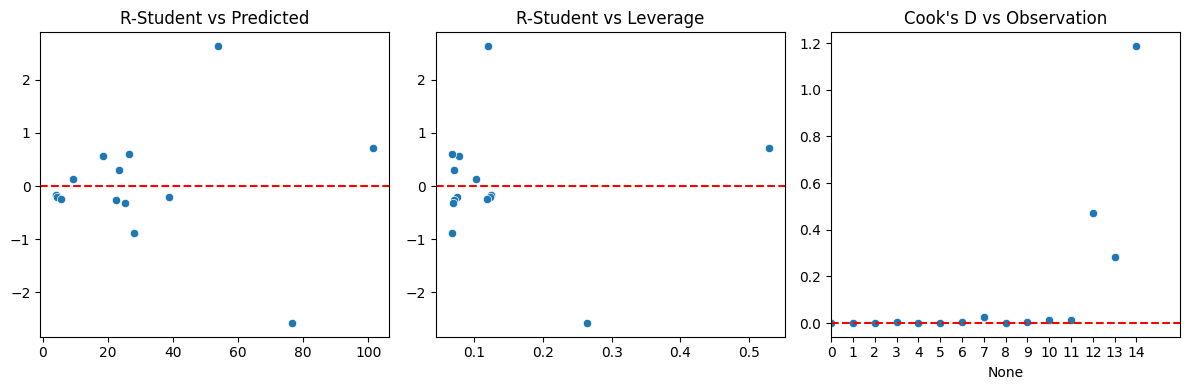

In [7]:
#Listing 7.1.4

plt.figure(3)

# Plot diagnostic plots
plt.figure(figsize=(12, 5))
residuals = y - y_prediction

# Scatter plot of predicted vs. actual values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y, y=y_prediction)
plt.title('Predicted vs. Actual Values')

# Residuals vs. Fitted Values plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=LR.predict(x), y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values')

plt.tight_layout()
plt.show()                # Finalize and render the figure


# Use statsmodels to perform OLS and access influence statistics
X_ols = sm.add_constant(x)
ols_model = sm.OLS(y, X_ols).fit()

# Access influence statistics
influence = ols_model.get_influence()
r_student = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag
cook_d = influence.cooks_distance


# Remove missing values
mask = ~np.isnan(r_student) & ~np.isnan(leverage)
r_student = r_student[mask]
leverage = leverage[mask]

# Plot R-Student vs Predicted
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=LR.predict(x), y=r_student)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('R-Student vs Predicted')

# Plot R-Student vs Leverage
plt.subplot(1, 3, 2)
sns.scatterplot(x=leverage, y=r_student)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('R-Student vs Leverage')

# Plot Cook's D vs Observation
plt.subplot(1, 3, 3)
sns.scatterplot(x=df.index, y=cook_d[0])
plt.xlim(0, 16)  # Set limits to have values above and below zero
# Set x-axis ticks to increment by 1
plt.xticks(np.arange(min(df.index), 15, 1))
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Cook's D vs Observation")

plt.tight_layout()
plt.show()


## Listing  7.2 Multiple Linear Regression

<Figure size 432x288 with 0 Axes>

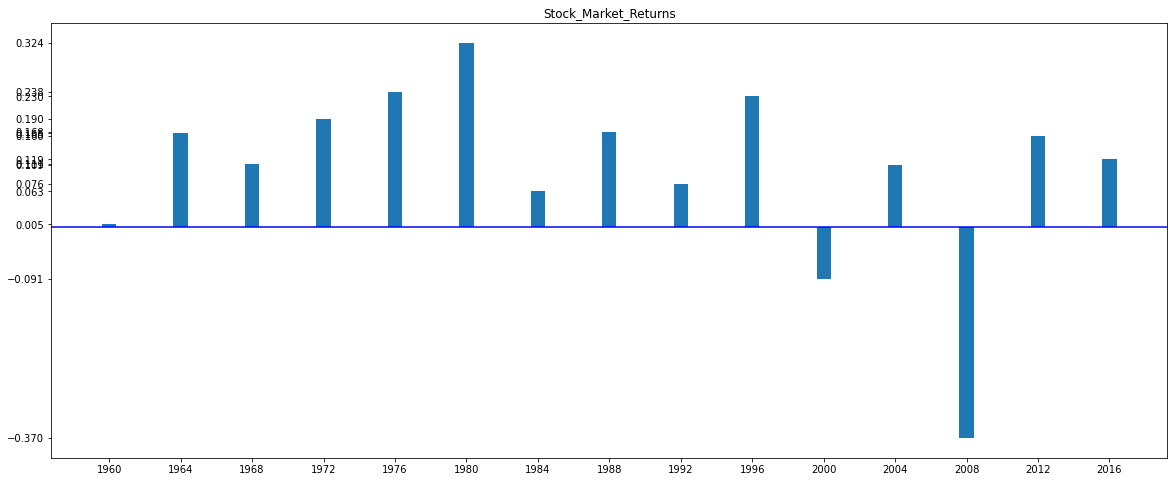

<Figure size 432x288 with 0 Axes>

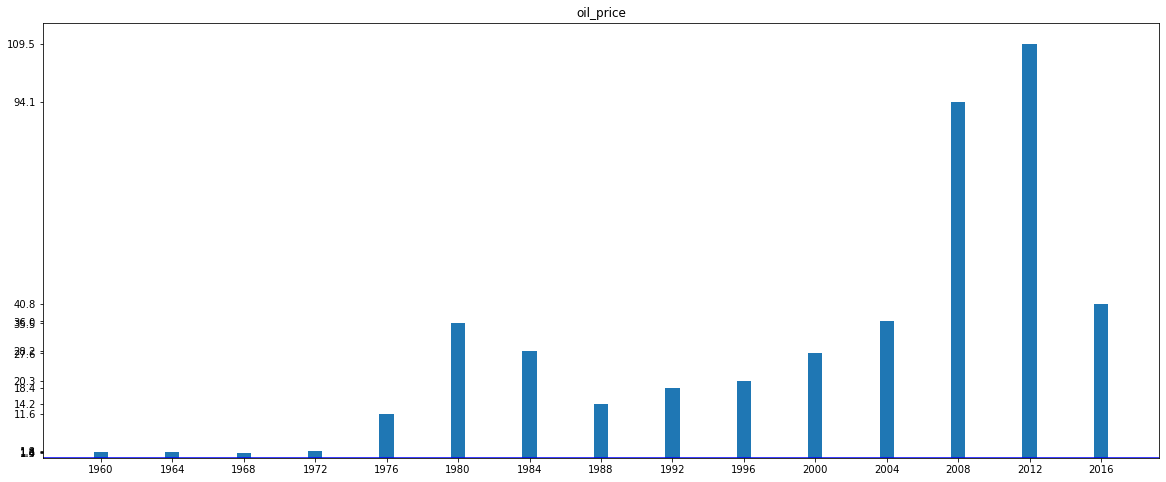

<Figure size 432x288 with 0 Axes>

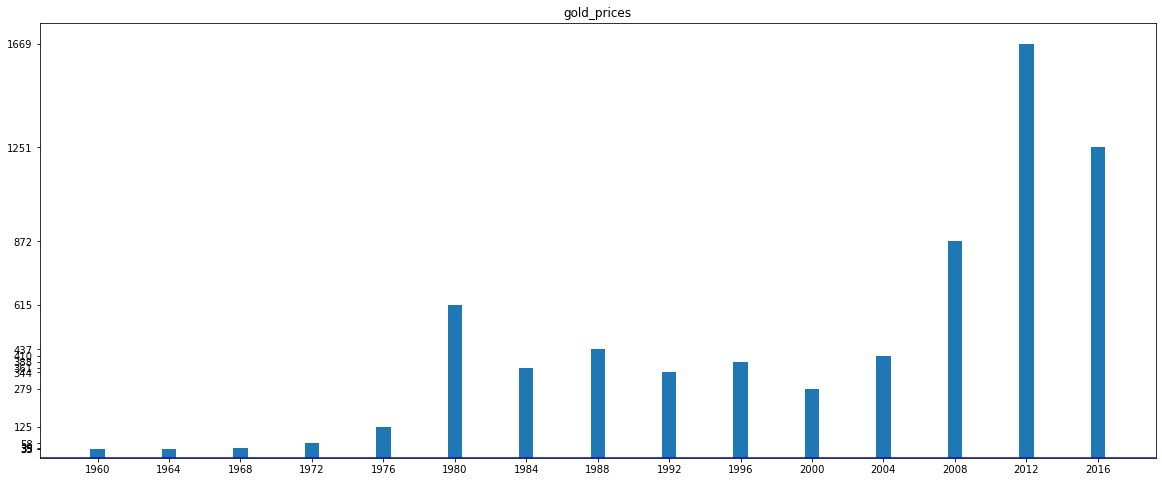

intercept: 0.13010280357814358
slope: [-0.0067133   0.00036367]
equation of Stock market returns= 0.13010280357814358 + -0.006713300291729812 * oil price + 0.00036367435673556966 *gold_prices


In [2]:
# Multiple Linear Regression

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

df = pd.read_excel('../Datasets/Chapter 7/sp_oil_gold.xlsx')

oil_price = df['oil price']
gold_prices = df['gold_prices']
Stock_Market_Returns=df['Stock Market Returns']
years=df['Year']

# Figure Size
plt.figure(0)
 # set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))
plt.xticks(years)
plt.yticks(Stock_Market_Returns)
plt.axhline(y=0, color='b', linestyle='-')
plt.title('Stock_Market_Returns')
#  Bar Plot
plt.bar(years,Stock_Market_Returns)

# Show Plot
plt.show()


plt.figure(1)
 # set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))
plt.xticks(years)
plt.yticks(oil_price)
plt.title('oil_price')
plt.axhline(y=0, color='b', linestyle='-')

#  Bar Plot
plt.bar(years,oil_price)

# Show Plot
plt.show()

plt.figure(2)
 # set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))
plt.xticks(years)
plt.yticks(gold_prices)
plt.title('gold_prices')
plt.axhline(y=0, color='b', linestyle='-')

#  Bar Plot
plt.bar(years,gold_prices)

# Show Plot
plt.show()



x=df[['oil price','gold_prices']].values
y=df['Stock Market Returns'].values

# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x,y)

print('intercept:', LR.intercept_)
print('slope:', LR.coef_)
print('equation of Stock market returns=',LR.intercept_,"+",LR.coef_[0],'* oil price +',LR.coef_[1],"*gold_prices")


## Listing  7.3 Logistic Regression: Titanic

In [1]:
#Listing 7.3.1
import pandas as pd
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('../Datasets/Chapter 7/titanic.csv')
print(df.head())

df['male'] = df['Gender'] == 'male'
x = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
print('x[0:5]=',x[0:5])
print('y[0:5]=',y[0:5])


   Survived  Pclass  Gender   Age  Siblings/Spouses  Parents/Children     Fare
0         0       3    male  22.0                 1                 0   7.2500
1         1       1  female  38.0                 1                 0  71.2833
2         1       3  female  26.0                 0                 0   7.9250
3         1       1  female  35.0                 1                 0  53.1000
4         0       3    male  35.0                 0                 0   8.0500
x[0:5]= [[3 True 22.0 1 0 7.25]
 [1 False 38.0 1 0 71.2833]
 [3 False 26.0 0 0 7.925]
 [1 False 35.0 1 0 53.1]
 [3 True 35.0 0 0 8.05]]
y[0:5]= [0 1 1 1 0]


In [2]:
#Listing 7.3.2
model = LogisticRegression()
model.fit(x, y)
print('model.coef_=',model.coef_)
print('model.intercept_=',model.intercept_)


model.coef_= [[-1.13645583 -2.6440994  -0.04237384 -0.38746621 -0.09619821  0.00297187]]
model.intercept_= [5.08856862]


In [3]:
#Listing 7.3.3
print('The predictions of the first 5 rows=',model.predict(x[:5]))
# [0 1 1 1 0]
print('The actual y values of the first 5 rows=',y[:5])
# [0 1 1 1 0]
y_pred = model.predict(x)
print('accuracy=',(y == y_pred).sum()/y.shape[0])
print('model score=',model.score(x,y))

The predictions of the first 5 rows= [0 1 1 1 0]
The actual y values of the first 5 rows= [0 1 1 1 0]
accuracy= 0.8049605411499436
model score= 0.8049605411499436
